In [1]:
# Dynamic
# %matplotlib notebook
# Standard
%matplotlib inline

import numpy as np
import pandas
import matplotlib.pyplot as plt
from os.path import join
import pickle
import sys
import seaborn as sns

# Allow to import the modules in the model folder
sys.path.append('../model/')

fig_width = 16 # full screen: 16 / half screen: 10
fig_height = 8

In [2]:
# /!\ global variables
l_div_th = [100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000]
coef_param = '0p_1rms' # /!\: careful of the values of pitch and rms

In [3]:
def delta_learning_step(start, stop):
    """
    /!\: use l_div_th and coef_param as global variable
    """
    l_seed = [0, 1, 2, 3, 4]
    
    full_data = []
    final_scores = []
    
    for div_th in l_div_th:

        """
        For one diversity_threshold,
        for each time window,
        store all the differences for all the seeds 
        """
        seeds_diff = None

        for i_seed in l_seed:
            path = '../model/res/nlm_div_th_test_180713_173751/'
            path += 'seed{}'.format(i_seed)            
            path += '+nlm_div_th_test+'+coef_param # /!\: careful of the values of pitch and rms
            path += '+{}_diversity_th'.format(div_th)

            with open(join(path, 'data.pkl'), 'rb') as f:
                songlog = pickle.load(f)
            root_data = [item[1] for item in songlog if item[0] == 'root']
            rd = pandas.DataFrame(root_data)
            # Save final scores
            final_scores.append(rd['scores'].iloc[-1])

            deltas = []

            for i in range(start, stop, 2):
                end = rd['scores'].iloc[i]
                beg = rd['scores'].iloc[i - 1]
                deltas.append(end - beg)

            deltas = np.asarray(deltas)
            # Initialization
            if seeds_diff is None:
                seeds_diff = deltas
            # Concatenation
            else:
                seeds_diff = np.concatenate((seeds_diff, deltas), axis=1)

        full_data.append(seeds_diff)
        
    nb_day_song = 3 # FIXME: hard coded, should be recover from the parameter
    final_scores = np.array(final_scores).reshape((-1, len(l_seed) * nb_day_song))
    return full_data, final_scores

# Calculations

In [4]:
night_data, final_scores = delta_learning_step(2, 30 * 2)

In [5]:
day_data, final_scores = delta_learning_step(1, 30 * 2 + 1)

In [6]:
for i in range(len(night_data)):
    print("div_th = {} ; {}:".format(l_div_th[i], coef_param))
    m_night = np.mean(night_data[i])
    m_day = np.mean(day_data[i])
    print("mean of mean degradation per night: {}".format(m_night))
    print("mean of mean optimization per day: {}".format(m_day))
    print("difference: {}".format(m_night + m_day))
    print()

div_th = 100 ; 0p_1rms:
mean of mean degradation per night: 1.0028782078773413
mean of mean optimization per day: -1.2609739030643046
difference: -0.2580956951869633

div_th = 250 ; 0p_1rms:
mean of mean degradation per night: 0.9673120793368727
mean of mean optimization per day: -1.2485731528336108
difference: -0.2812610734967381

div_th = 500 ; 0p_1rms:
mean of mean degradation per night: 0.9388316300625933
mean of mean optimization per day: -1.2000786115728108
difference: -0.2612469815102175

div_th = 750 ; 0p_1rms:
mean of mean degradation per night: 0.7768814056074734
mean of mean optimization per day: -1.0786720400058265
difference: -0.3017906343983531

div_th = 1000 ; 0p_1rms:
mean of mean degradation per night: 0.6246503009081315
mean of mean optimization per day: -0.9542496909521878
difference: -0.32959939004405636

div_th = 2000 ; 0p_1rms:
mean of mean degradation per night: 0.300293736576354
mean of mean optimization per day: -0.6437034703159927
difference: -0.34340973373963

# An example of the 2 type of graph

In [7]:
# # Scatter plot
# i = 1
# seeds_diff = night_data[i]
# plt.figure(figsize=(fig_width,fig_height))
# for i_song in range(len(seeds_diff.T)):
#     plt.plot(np.arange(1,len(seeds_diff.T[i_song]) + 1), seeds_diff.T[i_song], 'o', color='C0')
# plt.plot(np.arange(1,seeds_diff.shape[0] + 1), np.mean(seeds_diff, axis=1),
#          'o', color='C1', label="mean degradation per night")
# plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
# plt.legend()
# plt.title("diversity_threshold = {} ; {}\n (mean of 'mean degradation per night': {})".format(l_div_th[i], coef_param, round(np.mean(seeds_diff), 3)))
# plt.show()

# # Box plot
# plt.figure(figsize=(fig_width,fig_height))
# plt.boxplot(seeds_diff.T)
# plt.plot(np.arange(1,seeds_diff.shape[0] + 1), np.mean(seeds_diff, axis=1), 'o', label="mean degradation per night")
# plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
# plt.legend()
# plt.title("diversity_threshold = {} ; {}\n (mean of 'mean degradation per night': {})".format(l_div_th[i], coef_param, round(np.mean(seeds_diff), 3)))
# plt.show()

# night degradation for each simulation day

In [8]:
# for i in range(len(night_data)):
#     seeds_diff = night_data[i]
    
#     plt.figure(figsize=(fig_width,fig_height))
#     # -- scatter plot --
#     for i_song in range(len(seeds_diff.T)):
#         plt.plot(np.arange(1,len(seeds_diff.T[i_song]) + 1), seeds_diff.T[i_song], 'o', color='C0')
#     # -- box plot --
# #     plt.boxplot(seeds_diff.T)
#     plt.plot(np.arange(1,seeds_diff.shape[0] + 1), np.mean(seeds_diff, axis=1),
#              'o', color='C1', label="mean degradation per night")
#     plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
#     plt.legend()
#     plt.title("diversity_threshold = {} ; {}\n (mean of 'mean degradation per night': {})".format(l_div_th[i], coef_param, round(np.mean(seeds_diff), 3)))
#     plt.show()

# #     plt.figure(figsize=(fig_width,fig_height))
# #     plt.plot(np.mean(seeds_diff, axis=1), 'o')
# #     plt.axhline(y=np.mean(seeds_diff), color="k", linewidth=1, alpha=0.2, label="total mean")
# #     plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, label="zero")
# #     plt.show()

# day optimization for each simulation day

In [9]:
# for i in range(len(day_data)):
#     seeds_diff = day_data[i]
    
#     plt.figure(figsize=(fig_width,fig_height))
#     # -- scatter plot --
#     for i_song in range(len(seeds_diff.T)):
#         plt.plot(np.arange(1,len(seeds_diff.T[i_song]) + 1), seeds_diff.T[i_song], 'o', color='C0')
#     # -- box plot --
# #     plt.boxplot(seeds_diff.T)
#     plt.plot(np.arange(1,seeds_diff.shape[0] + 1), np.mean(seeds_diff, axis=1),
#              'o', color='C1', label="mean optimization per day")
#     plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
#     plt.legend()
#     plt.title("diversity_threshold = {} ; {}\n (mean of 'mean optimization per day': {})".format(l_div_th[i], coef_param, round(np.mean(seeds_diff), 3)))
#     plt.show()

# distribution of the degradations and the optimizations

In [10]:
# for i in range(len(l_div_th)):
#     plt.figure(figsize=(fig_width,fig_height))
#     sns.distplot(night_data[i].flatten(), label="night degradation")
#     sns.distplot(day_data[i].flatten(), label="day optimization")
#     plt.xlim(-8,8)
#     plt.xticks(np.arange(-8,9,1), np.arange(-8,9,1))
#     plt.legend()
#     plt.title("diversity_threshold {} ; {}".format(l_div_th[i], coef_param))
#     plt.show()

### Observations:

- Plus la valeur du paramètre diversity_threshold augmente, plus la dégradation moyenne nocturne et l'optimisation dans la journée ont des effets moindres (moins de dégradations et moins d'optimisations)

- Les améliorations moyennes sont plus élevées que les dégradations moyennes

- Une valeur de diversity_threshold élevée peut permettre de sélectionner des chants de structures différentes, mais dont les scores ne sont pas fortement dégradés pour autant car le score est impliqué dans le calcul de la fitness

- Lors des optimisations, pendant le jour, on ne fait qu'améliorer le score (logique au vu du déroulement de l'algorithme)

- Lors des dégradations, pendant la nuit, il arrive qu'à la sélection finale pour les chants du jour suivant, le choix améliore le score des chants
    - On le remarque particulièrement avec diversity_threshod = 2000 où au final, il y a beaucoup de petites améliorations. D'où l'obtention de scores faibles avec cette valeur de paramètre.


Idée de la fonction de fitness: Avoir un score faible et avoir un nombre de voisin faible

Un chant avec cette propriété sera sélectionné, il va donc crée un clone muté. Or ce clone risque d'être proche du chant, donc devenir un potentiel voisin. Rendant alors le chant sélectionner et son clone moins intéressant...

# Scatter plot: night degradation vs. score inverted (final song quality)

### MEAN degradation per night for each song (=15, because 3 song per seed and 5 seed per parameter)

In [11]:
# plt.figure(figsize=(fig_width, fig_height))
# for i in range(len(night_data)):
#     # shape: (nb_night, nb_seed * nb_day_song)
#     seeds_diff = night_data[i]
#     mean_deg_per_song = np.mean(seeds_diff, axis=0)
#     plt.plot(mean_deg_per_song, -final_scores[i],
#              'o', color="C{}".format(i),
#              label="div_th {}".format(l_div_th[i]))
# plt.grid()
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.xlabel("mean degradation per night")
# plt.ylabel("- distance error")
# plt.title('MEAN degradation per night vs. -dist_err (negative value to maximize)')
# plt.show()   

### MEDIAN degradation per night for each song (=15: 3 song per seed and 5 seed per parameter)

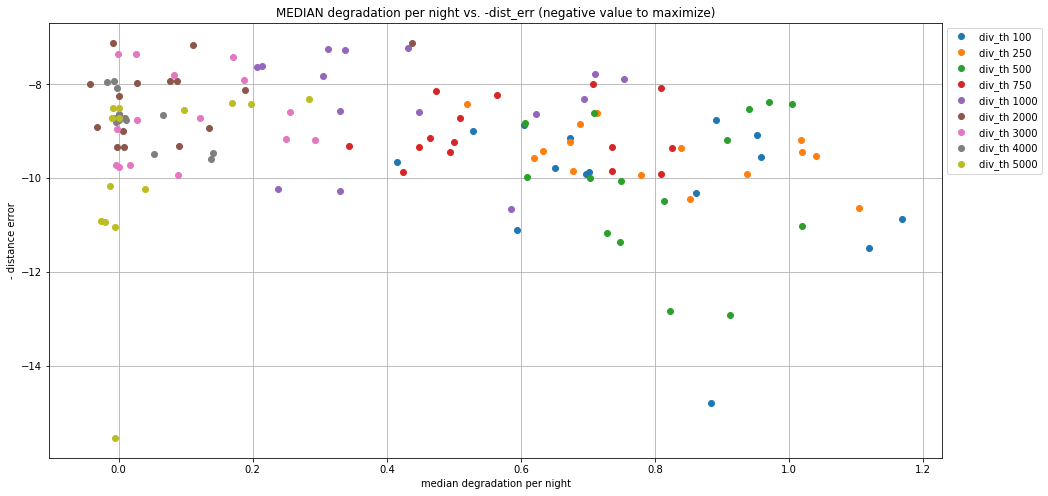

In [12]:
plt.figure(figsize=(fig_width, fig_height))
for i in range(len(night_data)):
    # shape: (nb_night, nb_seed * nb_day_song)
    seeds_diff = night_data[i]
    median_deg_per_song = np.median(seeds_diff, axis=0)
    plt.plot(median_deg_per_song, -final_scores[i],
             'o', color="C{}".format(i),
             label="div_th {}".format(l_div_th[i]))
plt.grid()
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("median degradation per night")
plt.ylabel("- distance error")
plt.title('MEDIAN degradation per night vs. -dist_err (negative value to maximize)')
plt.show()

### MEAN degradation per night for each BIRD (aggregation of the 3 songs per simulation)

In [13]:
# nb_day_song = 3 # FIXME: hard-coded...
# nb_seed = 5 # FIXME: hard-coded...

# plt.figure(figsize=(fig_width, fig_height))
# for i in range(len(night_data)):
#     # shape: (nb_night, nb_seed * nb_day_song)
#     seeds_diff = night_data[i]
#     sim_diff = []
#     sim_score_mean = []
    
#     for seed_id in range(nb_seed):
#         beg = nb_day_song*seed_id
#         end = nb_day_song*(seed_id+1)
#         sub_mat = seeds_diff[:, beg:end]
#         sub_list = final_scores[i][beg:end]
#         sim_diff.append(np.mean(sub_mat))
#         sim_score_mean.append(-np.mean(sub_list))

#     plt.plot(sim_diff, sim_score_mean,
#              'o', color="C{}".format(i),
#              label="mean dist_err (div_th {})".format(l_div_th[i]))
# plt.grid()
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.xlabel("mean degradation per night")
# plt.ylabel("- distance error")
# plt.title('MEAN degradation per night vs. -dist_err (negative value to maximize)')
# plt.xlim(-0.05, 1.4) # FIXME: hard coded
# plt.show()   

### MEDIAN degradation per night for each BIRD (aggregation of the 3 songs per simulation)

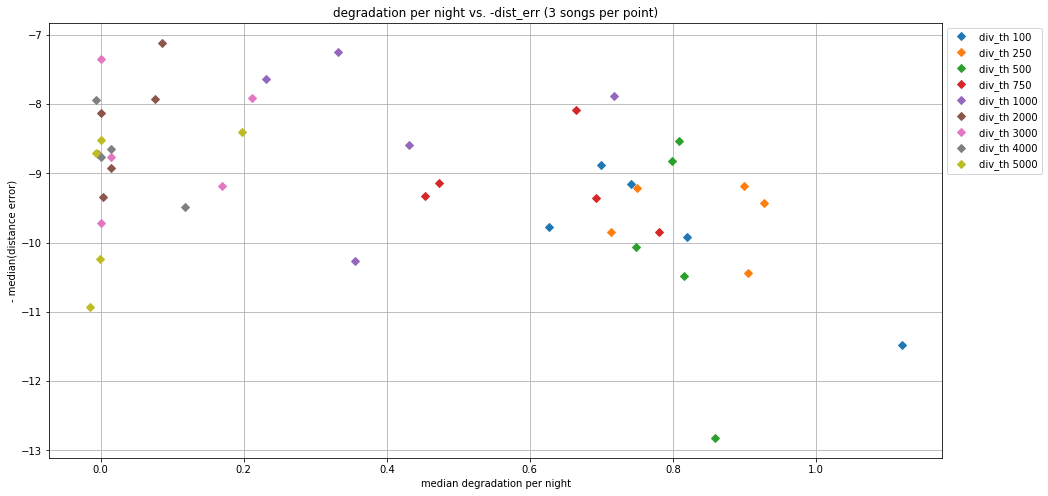

In [14]:
nb_day_song = 3 # FIXME: hard-coded...
nb_seed = 5 # FIXME: hard-coded...

plt.figure(figsize=(fig_width, fig_height))
for i in range(len(night_data)):
    # shape: (nb_night, nb_seed * nb_day_song)
    seeds_diff = night_data[i]
    sim_diff = []
    sim_score_median = []
    
    for seed_id in range(nb_seed):
        beg = nb_day_song*seed_id
        end = nb_day_song*(seed_id+1)
        sub_mat = seeds_diff[:, beg:end]
        sub_list = final_scores[i][beg:end]
        sim_diff.append(np.median(sub_mat))
        sim_score_median.append(-np.median(sub_list))
        
    plt.plot(sim_diff, sim_score_median,
             'D', color="C{}".format(i),
             label="div_th {}".format(l_div_th[i]))
    
plt.grid()
plt.legend(fontsize="small")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("median degradation per night")
plt.ylabel("- median(distance error)")
plt.title('degradation per night vs. -dist_err (3 songs per point)')
# plt.xlim(-0.05, 1.4) # FIXME: hard coded
plt.show()   

### MEAN degradation per nigth for each simulation parameter (1 point = MEAN over 15 songs)

Plot the mean score (circles) and the median score (diamonds) of all the results for 1 simulation parameter on the same plot

In [15]:
# plt.figure(figsize=(fig_width, fig_height))
# for i in range(len(night_data)):
#     # shape: (nb_night, nb_seed * nb_day_song)
#     seeds_diff = night_data[i]
#     mean_deg = np.mean(seeds_diff)
#     # mean of score of median of score????
#     plt.plot(mean_deg, -np.mean(final_scores[i]),
#              'o', color="C{}".format(i),
#              label="mean dist_err (div_th {})".format(l_div_th[i]))
#     plt.plot(mean_deg, -np.median(final_scores[i]),
#              'D', color="C{}".format(i),
#              label="median dist_err (div_th {})".format(l_div_th[i]))
# plt.grid()
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.xlabel("mean degradation per night")
# plt.ylabel("- distance error")
# plt.title('MEAN degradation per night vs. -dist_err (negative value to maximize)')
# plt.show()   

### MEDIAN degradation per nigth for each simulation parameter (1 point = MEDIAN over 15 songs)

- Mean score of all the results for 1 simulation parameter
- The y-error bar is the standard deviation around the mean score
- The x-error bars are the 1st and 3rd quantile around the median degradation per night 

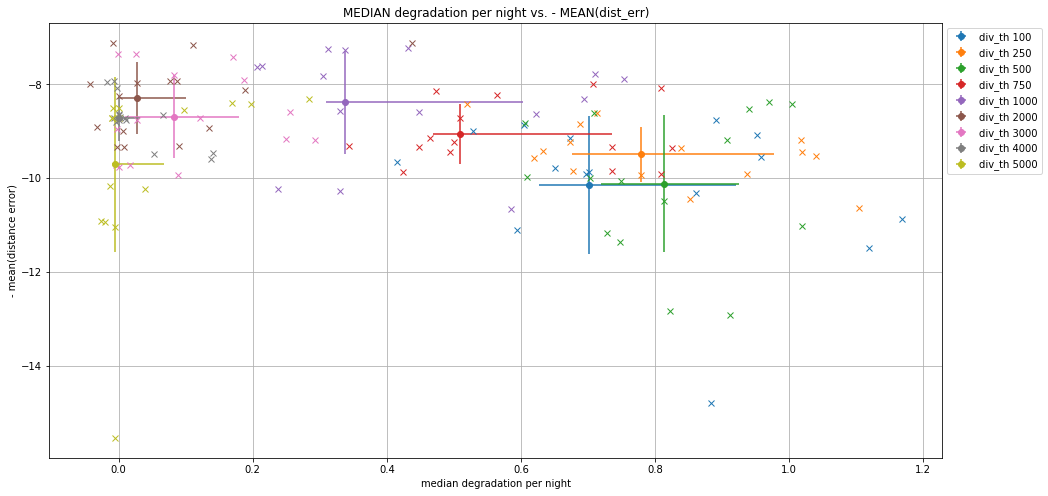

In [16]:
plt.figure(figsize=(fig_width, fig_height))
for i in range(len(night_data)):
# for i in range(2,3):
    # shape: (nb_night, nb_seed * nb_day_song)
    seeds_diff = night_data[i]
    median_deg_per_song = np.median(seeds_diff, axis=0)
    median_deg = np.median(median_deg_per_song)
    q1_deg = np.percentile(median_deg_per_song, 25)
    q3_deg = np.percentile(median_deg_per_song, 75)
    # xerr: shape(2, 1), define the errorbar sizes
    xerr = np.array([[median_deg - q1_deg],
                     [q3_deg - median_deg]])
    # mean of score
    mean_score = np.mean(final_scores[i])
    std_score = np.std(final_scores[i])
    plt.errorbar(x=median_deg, y=-mean_score,
                 xerr=xerr, yerr=std_score,
                 fmt='o', color="C{}".format(i),
                 label="div_th {}".format(l_div_th[i]))
    # plot each song results
    plt.plot(median_deg_per_song, -final_scores[i],
             'x', color="C{}".format(i))
plt.grid()
plt.xlabel("median degradation per night")
plt.ylabel("- mean(distance error)")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('MEDIAN degradation per night vs. - MEAN(dist_err)')
plt.show()

- Median score of all the results for 1 simulation parameter
- The y-error bar is 1st and 3rd quantile around the median score
- The x-error bars are the 1st and 3rd quantile around the median degradation per night 

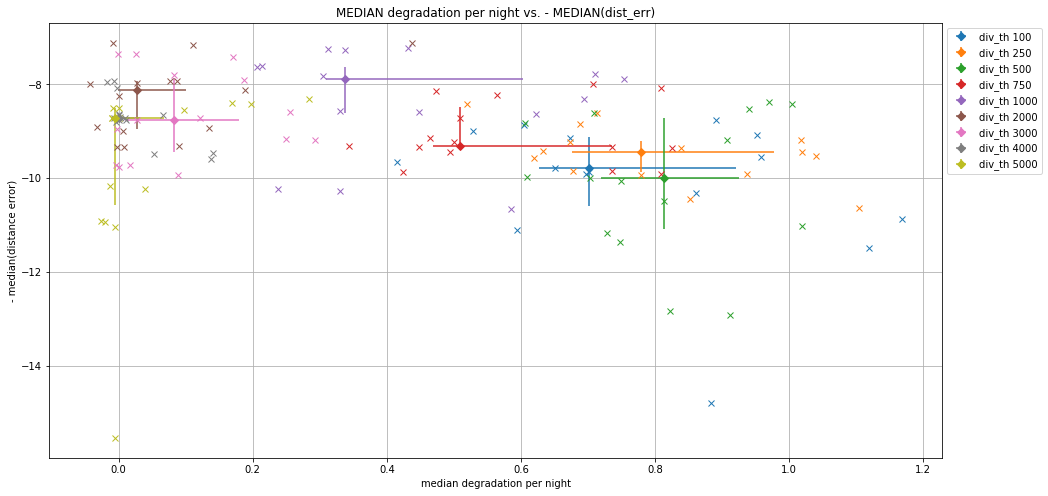

In [17]:
plt.figure(figsize=(fig_width, fig_height))
for i in range(len(night_data)):
    # shape: (nb_night, nb_seed * nb_day_song)
    seeds_diff = night_data[i]
    median_deg_per_song = np.median(seeds_diff, axis=0)
    median_deg = np.median(median_deg_per_song)
    q1_deg = np.percentile(median_deg_per_song, 25)
    q3_deg = np.percentile(median_deg_per_song, 75)
    # xerr: shape(2, 1), define the errorbar sizes
    xerr = np.array([[median_deg - q1_deg],
                     [q3_deg - median_deg]])
    # median of score
    median_score = np.median(final_scores[i])
    q1_deg = np.percentile(final_scores[i], 25)
    q3_deg = np.percentile(final_scores[i], 75)
    # yerr: shape(2, 1), define the errorbar sizes
    # /!\: yerr: negative values
    yerr = np.array([[-(median_score - q1_deg)],
                     [-(q3_deg - median_score)]])
    plt.errorbar(x=median_deg, y=-median_score,
                 xerr=xerr, yerr=yerr,
                 fmt='D', color="C{}".format(i),
                 label="div_th {}".format(l_div_th[i]))
    median_deg_per_song = np.median(seeds_diff, axis=0)
    # plot each song results
    plt.plot(median_deg_per_song, -final_scores[i],
             'x', color="C{}".format(i))
plt.grid()
plt.xlabel("median degradation per night")
plt.ylabel("- median(distance error)")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('MEDIAN degradation per night vs. - MEDIAN(dist_err)')
plt.show()   

# Delta of learning step (1 simulation)

In [18]:
# l_seed = [0, 1, 2, 3, 4]

# night_data = np.array([])
# day_data = np.array([])

# for i_seed in l_seed:
#     path = '../model/res/dev_test_180717_115457/'
#     path += 'seed{}'.format(i_seed)
#     path += '+default_dev+dev_test'

#     with open(join(path, 'data.pkl'), 'rb') as f:
#         songlog = pickle.load(f)
#     root_data = [item[1] for item in songlog if item[0] == 'root']
#     rd = pandas.DataFrame(root_data)

#     night_deltas = []
#     day_deltas = []

#     for i in range(1, len(rd)):
#         end = rd['scores'].iloc[i]
#         beg = rd['scores'].iloc[i - 1]
#         if i % 2 == 0:
#             night_deltas.append(end - beg)
#         else:
#             day_deltas.append(end - beg)
    
#     night_deltas = np.asarray(night_deltas)
#     day_deltas = np.asarray(day_deltas)
    
#     # Initialization
#     if len(night_data) == 0 and len(day_data) == 0:
#         night_data = night_deltas
#         day_data = day_deltas
#     # Concatenation
#     else:
#         night_data = np.concatenate((night_data, night_deltas), axis=1)
#         day_data = np.concatenate((day_data, day_deltas), axis=1)

In [19]:
# title_name = 'dev_test'

# plt.figure(figsize=(fig_width,fig_height))
# # -- scatter plot --
# for i_song in range(len(night_data.T)):
#     plt.plot(np.arange(1,len(night_data.T[i_song]) + 1), night_data.T[i_song], 'o', color='C0')
# plt.plot(np.arange(1,night_data.shape[0] + 1),
#          np.mean(night_data, axis=1),
#          'o', color='C1', label="mean degradation per night")
# plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
# plt.legend()
# plt.title("{}\n (mean of 'mean degradation per night': {})".format(title_name, round(np.mean(night_data), 3)))
# plt.show()
    
# plt.figure(figsize=(fig_width,fig_height))
# # -- scatter plot --
# for i_song in range(len(day_data.T)):
#     plt.plot(np.arange(1,len(day_data.T[i_song]) + 1), day_data.T[i_song], 'o', color='C0')
# plt.plot(np.arange(1,day_data.shape[0] + 1),
#          np.mean(day_data, axis=1),
#          'o', color='C1', label="mean optimization per day")
# plt.axhline(y=0, color="k", linewidth=1, alpha=0.2, ls="--")
# plt.legend()
# plt.title("{}\n mean of 'mean optimization per day': {}".format(title_name, round(np.mean(day_data), 3)))
# plt.show()

# plt.figure(figsize=(fig_width,fig_height))
# sns.distplot(night_data.flatten(), label="night degradation")
# sns.distplot(day_data.flatten(), label="day optimization")
# plt.xlim(-6, 6)
# plt.xticks(np.arange(-6,7,1), np.arange(-6,7,1))
# plt.legend()
# plt.title("{}\n distribution of score difference during learning".format(title_name))
# plt.show()